In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
os.chdir("G:\\New Folder\\titanic")

In [2]:
data1 = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')
target = data1['Survived']
data = pd.concat([data1, data2], axis=0)

In [3]:
data['Sex'] = data['Sex'].replace({'male': 1, 'female': 0})

In [4]:
family = pd.DataFrame()
family['Family'] = data['Parch'] + data['SibSp'] + 1
family['Single'] = family['Family'].map(lambda x: 1 if x == 1 else 0)
family['Small'] = family['Family'].map(lambda x: 1 if x>=2 and x<=5 else 0)
family['Large'] = family['Family'].map(lambda x: 1 if x>5 else 0)

In [5]:
data['Age'] = data['Age'].astype(float)
data['Age'] = data['Age'].fillna(np.mean(data['Age']))
data['Age'] = data['Age'].astype(int)
Age_Group = pd.DataFrame()
Age_Group['Age'] = data['Age']
Age_Group['Child'] = Age_Group['Age'].map(lambda x: 1 if x<=15 else 0)
Age_Group['Young Adult'] = Age_Group['Age'].map(lambda x: 1 if x>15 and x <40 else 0)
Age_Group['Adult'] = Age_Group['Age'].map(lambda x: 1 if x>=40 and x<60 else 0)
Age_Group['Elder'] = Age_Group['Age'].map(lambda x: 1 if x>=60 else 0)

In [6]:
data['Embarked'] = data['Embarked'].fillna('S')

In [7]:
Name = pd.DataFrame()
Name['Name'] = data['Name']
Name['NameLength'] = Name['Name'].map(lambda x: len(x))
Name['Title'] = Name['Name'].map(lambda x: x.split(',')[1].split(' ')[1].split('.')[0])
Name['Title'] = Name['Title'].replace({"Capt":       "Officer",
                                        "Col":        "Officer",
                                        "Major":      "Officer",
                                        "Jonkheer":   "Royalty",
                                        "Don":        "Royalty",
                                        "Sir" :       "Royalty",
                                        "Dr":         "Officer",
                                        "Rev":        "Officer",
                                        "the Countess":"Royalty",
                                        "Dona":       "Royalty",
                                        "Mme":        "Mrs",
                                        "Mlle":       "Miss",
                                        "Ms":         "Mrs",
                                        "Mr" :        "Mr",
                                        "Mrs" :       "Mrs",
                                        "Miss" :      "Miss",
                                        "Master" :    "Master",
                                        "Lady" :      "Royalty",
                                        "the":        "Royalty"})

In [8]:
Name = Name.drop('Name', axis=1)

In [9]:
Name_dummies = pd.get_dummies(Name['Title'])

In [10]:
Name = Name.drop('Title', axis = 1)
Name = pd.concat([Name, Name_dummies], axis=1)

In [11]:
Embarked = pd.DataFrame()
Embarked = pd.get_dummies(data['Embarked'], prefix = 'Embarked')

In [12]:
PClass = pd.DataFrame()
PClass = pd.get_dummies(data['Pclass'], prefix = 'PClass')

In [13]:
data['Cabin'] = data['Cabin'].fillna("U")

In [14]:
Cabin = pd.DataFrame()
Cabin['Cabin'] = data['Cabin']
Cabin['Cabin_Class'] = Cabin['Cabin'].map(lambda x: x[0])

In [15]:
Cabin = Cabin.drop('Cabin', axis=1)
Cabin = pd.get_dummies(Cabin)

In [16]:
Ticket = pd.DataFrame()
Ticket['Ticket'] = data['Ticket']
Ticket['Class'] = Ticket['Ticket'].map(lambda x: x.split(" ")[0])
Ticket['Class'] = Ticket['Class'].map(lambda x: 'Und' if x.isdigit() == True else x)
Ticket['Class'] = Ticket['Class'].map(lambda x: x.split("/")[0].split('.')[0])

In [17]:
Ticket = Ticket.drop('Ticket', axis=1)
Ticket = pd.get_dummies(Ticket)

In [18]:
data = data.drop(['Cabin', 'Embarked', 'Name', 'Parch',
                  'PassengerId', 'Pclass', 'SibSp', 'Survived', 'Ticket', 'Age'], axis=1)

In [19]:
full = pd.concat([data, family, Age_Group, Name, Ticket, Embarked, PClass, Cabin], axis=1)

In [20]:
full['Fare'] = full['Fare'].fillna(np.mean(full['Fare']))

In [21]:
from sklearn.preprocessing import MinMaxScaler
temp = MinMaxScaler()
full['Age'] = temp.fit_transform(full['Age'])
full['Fare'] = temp.fit_transform(full['Fare'])

C:\Users\Ankit Kumar Singh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\Ankit Kumar Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Ankit Kumar Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users

In [22]:
feature = full[:891]
test = full[891:]

In [23]:
def val_generation():
    from sklearn.model_selection import train_test_split
    p = np.random.randint(low=1, high=100)
    xorg, xval, yorg, yval = train_test_split(feature, target, random_state=p, test_size = 0.3)
    return xorg, xval, yorg, yval
def learning_curve(model):
    x1, x2, y1, y2 = val_generation()
    training_error = []
    validation_error = []
    for i in range(10,len(x1)):
        model.fit(x1.iloc[:i, :], y1[:i])
        training_err = np.sum((model.predict(x1.iloc[:i, :]) - y1[:i])**2)
        validation_err = np.sum((model.predict(x2) - y2)**2)
        training_error.append(training_err)
        validation_error.append(validation_err)
    plt.plot(list(range(10, len(x1))), training_error, color='green', label='Training Error')
    plt.plot(list(range(10, len(x1))), validation_error, color='red', label='Validation Error')
    plt.xlabel('Number of Observations')
    plt.ylabel('Sum of Squared Errors')
    plt.legend()

In [24]:
def cv(model):
    a = cross_val_score(model, feature, target, cv=5)
    return np.mean(a)

In [25]:
original2 = pd.read_csv('test.csv')
original2.head()
def kaggle(model, text):
    test_Y = model.predict(test).astype(int)
    passenger_id = original2.PassengerId
    test1 = pd.DataFrame({'PassengerId': passenger_id, 'Survived': test_Y})
    test1.to_csv(text, index = False)

## 1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [27]:
reg.fit(feature, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(reg, feature, target, cv=5))

0.82608572917032375

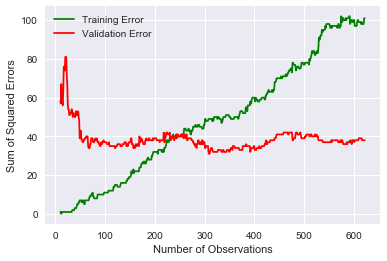

In [29]:
learning_curve(reg)

In [30]:
from sklearn.model_selection import GridSearchCV
reg.solver = 'newton-cg'
params = {'C': [0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9 ,1, 2]}
gscv = GridSearchCV(reg, params, cv=5)
gscv.fit(feature, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [31]:
reg = gscv.best_estimator_

In [32]:
reg.fit(feature, target)

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
cv(reg)

0.82944396154745026

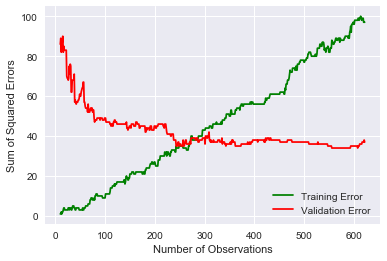

In [34]:
learning_curve(reg)

In [35]:
kaggle(reg, 'kaggle_titanic2')

## 2. Support Vector Machine

In [36]:
from sklearn.svm import SVC, LinearSVC
svm = SVC()
svm.fit(feature, target)
cv(svm)

0.81820158756672046

In [37]:
svm.C = 5
cv(svm)

0.82159134714785187

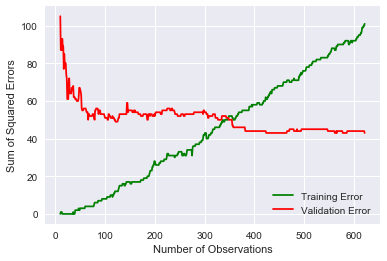

In [38]:
learning_curve(svm)

In [39]:
from sklearn.grid_search import GridSearchCV
params = {'C': [9, 10, 11, 12, 13, 14],
          'gamma': [0.15, 0.02, 0.25, 0.03, 0.04, 0.05]}
gscv = GridSearchCV(svm, params, cv=5)
gscv.fit(feature, target)

C:\Users\Ankit Kumar Singh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Ankit Kumar Singh\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [9, 10, 11, 12, 13, 14], 'gamma': [0.15, 0.02, 0.25, 0.03, 0.04, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [40]:
svm = gscv.best_estimator_

In [41]:
svm

SVC(C=11, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.02, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
cv(svm)

0.82827628469809955

In [43]:
kaggle(svm, 'kaggle_titanic100.csv')

## 3. K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(feature, target)
cv(knn)

0.78901892235122717

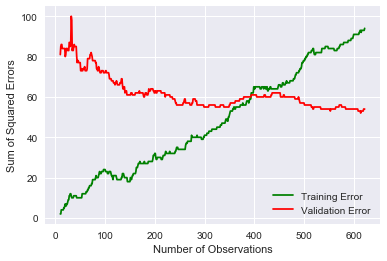

In [45]:
learning_curve(knn)

In [46]:
params  = {'n_neighbors': [1,2,3,4,5,7,8,10,15]}
gscv = GridSearchCV(knn, params, cv=5)
gscv.fit(feature, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 8, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [47]:
knn = gscv.best_estimator_

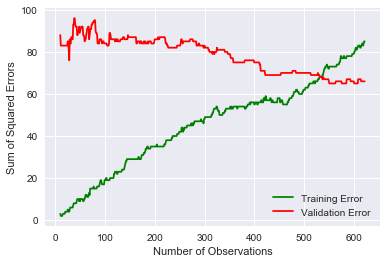

In [48]:
learning_curve(knn)

In [49]:
cv(knn)

0.78901892235122717

## 4. Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
nbs = GaussianNB()
nbs.fit(feature, target)
cv(nbs)

0.61479079802836167

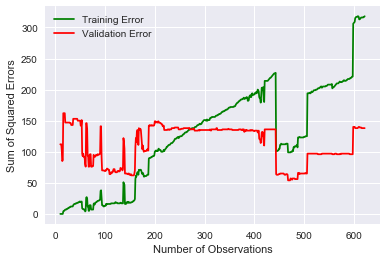

In [51]:
learning_curve(nbs)

## 5. Decision Trees

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(feature, target)
cv(dtf)

0.77665224359144869

In [53]:
params = {'max_depth': [3,4,5,6],
          'min_samples_leaf': [4,5,6,8,10],
          'min_samples_split': [10,12,15,17,18,20],
          'max_features': [7,42,45,48,49,50,51,52,55]}
gscv = GridSearchCV(dtf, params, cv=5)
gscv.fit(feature, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [4, 5, 6, 8, 10], 'min_samples_split': [10, 12, 15, 17, 18, 20], 'max_features': [7, 42, 45, 48, 49, 50, 51, 52, 55]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [54]:
dtf = gscv.best_estimator_

In [55]:
cv(dtf)

0.82717159132941609

In [56]:
kaggle(dtf, 'kaggle_titanic4')

## 6. Random Forests

In [1]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfn = RandomForestClassifier()
params = {'n_estimators': [4, 6, 9, 12, 50, 100], 
          'max_features': ['log2', 'sqrt','auto'], 
          'criterion': ['entropy', 'gini'],
          'max_depth': [2, 3, 5, 10], 
          'min_samples_split': [2, 3, 5,7],
          'min_samples_leaf': [1,5,8,10]
         }
gscv = GridSearchCV(rfn, params, cv=5)
gscv.fit(feature, target)

KeyboardInterrupt: 

In [58]:
rfn = gscv.best_estimator_

In [59]:
cv(rfn)

0.82489886647466637

In [60]:
kaggle(rfn, 'kaggle_titanic5')

In [61]:
rfn

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=8,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=12, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [62]:
params = {'max_depth': [3, 5, 10, 12],
          'min_samples_split': [4, 5, 7, 10, 12],
          'max_features': ['log2', 'sqrt', 55],
          'criterion': ['gini', 'entropy']}
gscv = GridSearchCV(rfn, params, cv=5)
gscv.fit(feature, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=8,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=12, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 10, 12], 'min_samples_split': [4, 5, 7, 10, 12], 'max_features': ['log2', 'sqrt', 55], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

## 7. AdaBoost

In [63]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(feature, target)
cv(adb)

0.81034241238788596

In [64]:
parameters = {'n_estimators': [120, 150, 170, 200], 'learning_rate': [0.01, 0.05, 0.08, 0.09, 0.1]}
gscv = GridSearchCV(adb, parameters, cv=5)
gscv.fit(feature, target)
gscv.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=120, random_state=None)

In [65]:
adb = gscv.best_estimator_

In [66]:
cv(adb)

0.82608572917032386

In [67]:
kaggle(adb, 'kaggle_titanic10')

## 8. Gradient Boosting Machines

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
cv(gbm)

0.82497468780443339

In [69]:
gbm

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [70]:
params = {'n_estimators': [50, 60, 70, 80, 100, 120]}
gscv = GridSearchCV(gbm, params, cv=5)
gscv.fit(feature, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 60, 70, 80, 100, 120]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [71]:
gbm = gscv.best_estimator_

In [72]:
params = {'min_samples_split': [2, 3, 4, 5, 7],
          'min_samples_leaf': [1, 2, 3, 4],
          'max_depth': [1, 2, 3, 4, 5]}
gscv = GridSearchCV(gbm, params, cv=5)
gscv.fit(feature, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4], 'max_depth': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [73]:
gscv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=4,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [74]:
gbm = gscv.best_estimator_

In [75]:
params = {'max_features': ['log2', 'sqrt', 'auto', 55]}
gscv = GridSearchCV(gbm, params, cv=5)
gscv.fit(feature, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=4,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['log2', 'sqrt', 'auto', 55]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [76]:
gbm = gscv.best_estimator_

In [77]:
params = {'subsample': [0.75, 0.80, 0.85, 0.90, 0.95, 1]}
gscv = GridSearchCV(gbm, params, cv=5)
gscv.fit(feature, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=4,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'subsample': [0.75, 0.8, 0.85, 0.9, 0.95, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [78]:
gbm = gscv.best_estimator_

In [1]:
cv(gbm)

NameError: name 'cv' is not defined

# Ensembling

In [80]:
def oof(model):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-80-b1d396121803>, line 2)